In [1]:
# HIDDEN
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

def read_file(f):
    with open (f, 'r') as file:
        data=file.read()
    return data

In [2]:
# HIDDEN

# Read two books, fast (again)!

huck_finn_text = read_file('huck_finn.txt')
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_text = read_file('little_women.txt')
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

*The Adventures of Huckleberry Finn* describes a journey that Huck and Jim take along the Mississippi River. Tom Sawyer joins them towards the end as the action heats up. Having loaded the text, we can quickly visualize how many times these characters have each been mentioned at any point in the book.

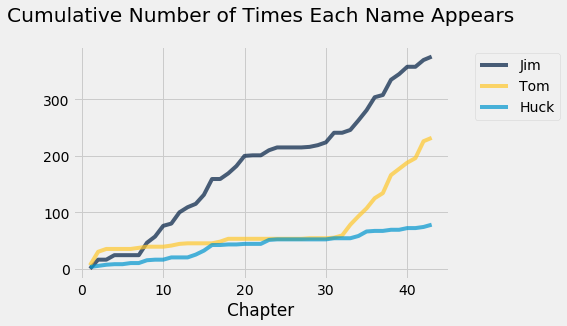

In [3]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

In the plot above, the horizontal axis shows chapter numbers and the vertical axis shows how many times each character has been mentioned up to and including that chapter. 

You can see that Jim is a central character by the large number of times his name appears. Notice how Tom is hardly mentioned for much of the book until he arrives and joins Huck and Jim, after Chapter 30. His curve and Jim's rise sharply at that point, as the action involving both of them intensifies. As for Huck, his name hardly appears at all, because he is the narrator. 

*Little Women* is a story of four sisters growing up together during the civil war. In this book, chapter numbers are spelled out and chapter titles are written in all capital letters.

In [4]:
# The chapters of Little Women, in a table

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas wit ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" crie ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfe ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the mo ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of ..."


We can track the mentions of main characters to learn about the plot of this book as well.  The protagonist Jo interacts with her sisters Meg, Beth, and Amy regularly, up until Chapter 27 when she moves to New York alone.

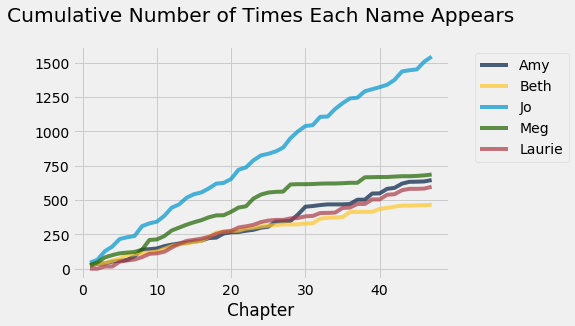

In [5]:
# Counts of names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),

    ])

# Plot the cumulative counts.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08);

Laurie is a young man who marries one of the girls in the end. See if you can use the plots to guess which one.